In [42]:
import numpy
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape , y_train.shape , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

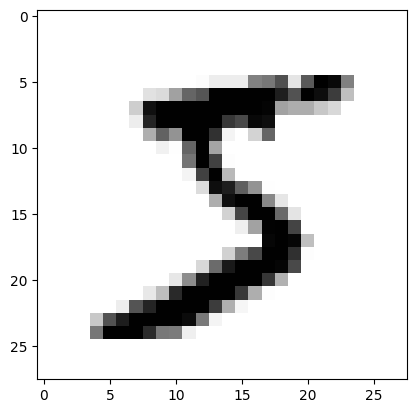

In [45]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary", interpolation="nearest")
plt.axis("on")
plt.show()

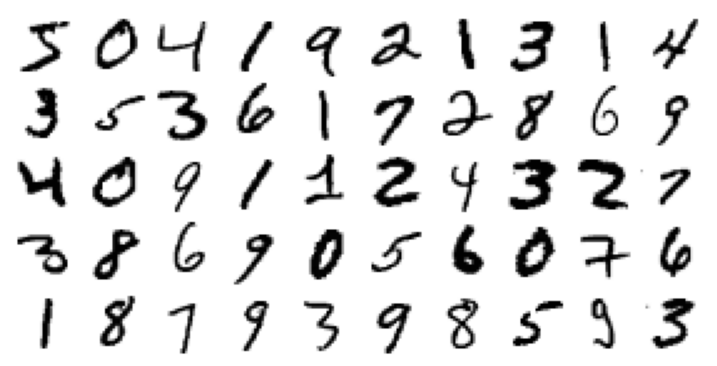

In [46]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X_train[:50]):
    plt.subplot(10, 10, idx + 1)
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [47]:
import numpy as np

#Preprocessing the Images
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#Reshape/Expand the dimensions of images to 28, 28, 1
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#convert to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [48]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

In [49]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [59]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 4, verbose = 1)

mc = ModelCheckpoint("./bestmodel.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True)

cb = [es, mc]

In [60]:
his = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3, callbacks = cb)

Epoch 1/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9994 - loss: 0.0017
Epoch 1: val_accuracy improved from -inf to 0.99006, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9901 - val_loss: 0.0883
Epoch 2/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9986 - loss: 0.0041
Epoch 2: val_accuracy improved from 0.99006 to 0.99150, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9915 - val_loss: 0.0671
Epoch 3/50
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9991 - loss: 0.0037
Epoch 3: val_accuracy did not improve from 0.99150
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9909 - val_loss: 0.0648
Epoch 4/50
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9989 - loss: 0.0032
Epoch 4: val_accuracy did not improve from 0.99150
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9989 - loss: 0.0032 - val_accuracy: 0.9909 - val_loss: 0.0660
Epoch 5/50
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9988 - loss: 0.0034
Epoch 5: val_accuracy improved from 0.99150 to 0.99167, saving model to ./bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9988 - loss: 0.0034 - val_accuracy: 0.9917 - val_loss: 0.0645
Epoch 5: early stopping


In [62]:
model_S = keras.models.load_model("D://Labeeq//MLProjects//bestmodel.h5")

In [63]:
score = model_S.evaluate(X_test, y_test)

print(f"The model accuracy is {score[1]} ")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9904 - loss: 0.0746
The model accuracy is 0.9915000200271606 
